# Importar librerías

In [ ]:
# Manipulación de datos
import pandas as pd

# Opcional: ver todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Visualización
import matplotlib.pyplot as plt

# Guardado y carga de modelos
import joblib

# División de datos y validación
from sklearn.model_selection import train_test_split

# Modelos de regresión
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Carga de datos

In [25]:
# Cargamos datos y leemos las primeras 5 filas
df_cla= pd.read_csv('../data/processed/df_clasificacion.csv', sep=';')
df_cla.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,nota_final,aprobado,horario_desconocido,horario_mañana,horario_noche,horario_tarde,estilo_auditivo,estilo_desconocido,estilo_kinestésico,estilo_lectura/escritura,estilo_visual
0,0.331667,0.269000,0.833000,0.446667,0.636364,0.0,1.0,0.777143,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.418333,0.726143,0.793125,0.103333,0.000000,1.0,0.0,0.600000,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.146250,0.862571,0.682750,0.626667,0.636364,0.0,0.0,0.714286,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235417,0.741143,0.785625,0.765000,0.454545,0.0,0.0,0.688571,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.517857,0.431750,0.445000,0.272727,0.5,0.0,0.514286,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Separación del conjunto de datos

In [26]:
# Variable objetivo
tv = 'aprobado'

# Definimos las variables predictoras (X) de la variable objetivo y
X = df_cla.drop(columns=[tv])
y = df_cla[tv]

In [27]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f'Tamaño del conjunto de entranmiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

Tamaño del conjunto de entranmiento: (800, 17)
Tamaño del conjunto de prueba: (200, 17)


# Entrenamiento del modelo

In [28]:
# Creamos el modelo de regresión linela
modelo = LogisticRegression(penalty='l2', C=1, max_iter=200)

# Ajustar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = modelo.predict(X_test)

# Obtener las probabilidades de predicción
y_prob = modelo.predict_proba(X_test)[:, 1] # Probabilidad de clase positiva

# Validación del modelo

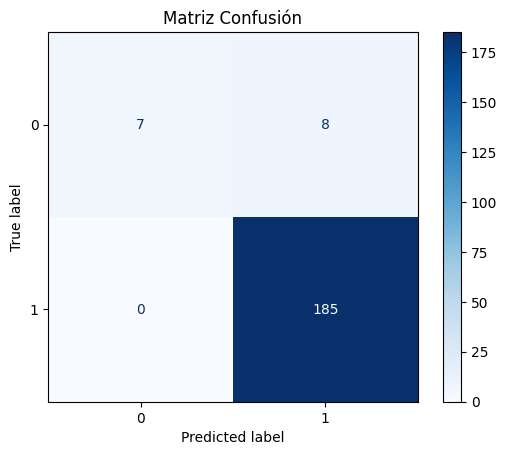

In [29]:
# Calcular matriz confusión
cm= confusion_matrix(y_test, y_pred)

# Visualizar matriz confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz Confusión')
plt.show()


### Métricas

In [30]:
# Predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# Obtener las probabilidades de predicciones 
y_train_proba = modelo.predict_proba(X_train)
y_test_proba =  modelo.predict_proba(X_test)


##### Cálculo de métricas

In [31]:
metrics = {
    'train': {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1-score': f1_score(y_train, y_train_pred),
    },
    'test': {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1-score': f1_score(y_test, y_test_pred),
    },
}

In [32]:
# Mostramos la métricas en un df
df_metrics = pd.DataFrame(metrics).T.round(2)
df_metrics

,Accuracy,Precision,Recall,F1-score
train,0.92,0.92,1.0,0.96
test,0.96,0.96,1.0,0.98


In [33]:
# Comrpobamos si la variable y esta desbalanceada
y.value_counts(normalize=True)

aprobado
1    0.898
0    0.102
Name: proportion, dtype: float64

In [34]:
# Cálculo de métricas con desbalanceo
metrics_weighted = {
    'train': {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'F1-score': f1_score(y_train, y_train_pred, average='weighted'),
    },
    'test': {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_test_pred, average='weighted'),
    },
}

# Mostramos la métricas en un df
df_metrics_wei = pd.DataFrame(metrics_weighted).T.round(2)
df_metrics_wei

,Accuracy,Precision,Recall,F1-score
train,0.92,0.93,0.92,0.90
test,0.96,0.96,0.96,0.95


# Importancia de las Características

In [35]:
# Crear DF con los coeficientes
coef_df = pd.DataFrame({'Feature': X.columns.to_list(), 'Coefficient': modelo.coef_[0]})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False, key=abs)
coef_df

,Feature,Coefficient
7,nota_final,7.729006
0,horas_estudio_semanal,1.828739
1,nota_anterior,1.423191
2,tasa_asistencia,0.775677
5,nivel_dificultad,-0.745375
8,horario_desconocido,0.484177
3,horas_sueno,0.353050
10,horario_noche,-0.351345
15,estilo_lectura/escritura,0.274808
16,estilo_visual,-0.243085


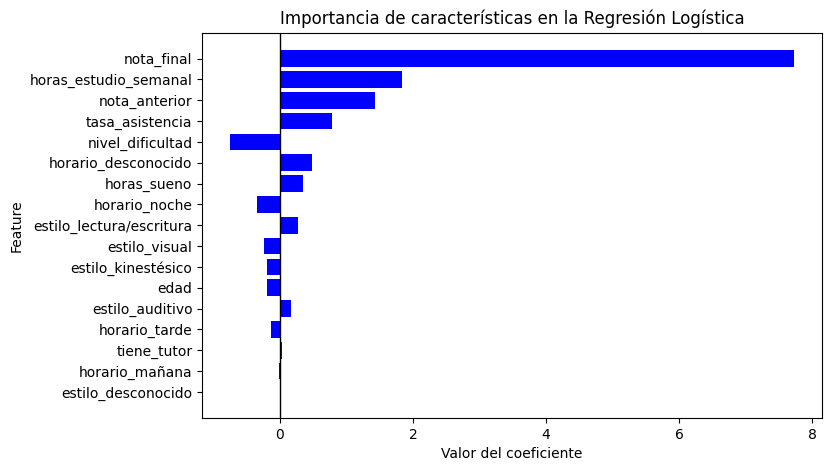

In [36]:
# Visualización los coeficientes con un gráfico de barras
plt.figure(figsize=(8,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Feature')
plt.title('Importancia de características en la Regresión Logística')
plt.axvline(0, color='black', linewidth=1) # Línea en 0 para la referencia
plt.gca().invert_yaxis() # Invertir eje para que la más importante esté arriba
plt.show()

### Entrenamiento Final

In [ ]:
# Entrenar el modelo con todo el conjunto de datos
modelo_final = LogisticRegression(penalty='l2', C=1.0, max_iter=200, n_jobs=-1)
modelo_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(modelo_final, '../models/modelo_clasificacion.pkl')

['../models/modelo_clasificacion.pkl']

### Comparativa de variantes de regresión logística con regularización

In [40]:
# Definir modelos de regularizacion 
models ={
    'Logistic (L2 - Ridge)': LogisticRegression(penalty='l2', C=1.0, solver='liblinear'),
    'Logistic (L1 - Lasso)': LogisticRegression(penalty='l1', C=0.1, solver='liblinear'),
    'Logistic (ElasticNet)': LogisticRegression(penalty='elasticnet', C=0.1, l1_ratio=0.5, solver='saga'),
}

# Inicializar diccionario
metrics_results_cla = {}

# Entrenar y evalucar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train) 

    # Predecir entrenamiento y prueba
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)

    # Calcular métricas
    metrics_results_cla[name] = {
            'Train Accuracy': accuracy_score(y_train, y_train_pred),
            'Train Precision (Weighted)': precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
            'Train Recall (Weighted)': recall_score(y_train, y_train_pred, average='weighted', zero_division=0),
            'Train F1 (Weighted)': f1_score(y_train, y_train_pred, average='weighted', zero_division=0),

            'Test Accuracy': accuracy_score(y_test, y_test_pred),
            'Test Precision (Weighted)': precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
            'Test Recall (Weighted)': recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
            'Test F1 (Weighted)': f1_score(y_test, y_test_pred, average='weighted', zero_division=0),
    }

# Convertir las métricas en df
df_metrics_results_cla = pd.DataFrame(metrics_results_cla).T.round(2)
df_metrics_results_cla

,Train Accuracy,Train Precision (Weighted),Train Recall (Weighted),Train F1 (Weighted),Test Accuracy,Test Precision (Weighted),Test Recall (Weighted),Test F1 (Weighted)
Logistic (L2 - Ridge),0.92,0.93,0.92,0.90,0.96,0.96,0.96,0.95
Logistic (L1 - Lasso),0.89,0.90,0.89,0.84,0.92,0.86,0.92,0.89
Logistic (ElasticNet),0.89,0.79,0.89,0.84,0.92,0.86,0.92,0.89
